In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import multioutput
from sklearn import multiclass
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm
from sklearn import tree

In [2]:
os.chdir('C:/Users/tku/Desktop/data/finish')
filename = 'm.csv'
df = pd.read_csv(filename)
df_dum = pd.get_dummies(df)
list(df_dum)

['chinese',
 'english',
 'math',
 'society',
 'science',
 'PR',
 'H_GPA',
 'M',
 'M_10_A',
 'M_10_B',
 'M_10_C',
 'M_10_D',
 'M_10_E',
 'M_10_F',
 'M_10_G',
 'M_10_H',
 'M_10_I',
 'M_10_J',
 'M_5_A',
 'M_5_B',
 'M_5_C',
 'M_5_D',
 'M_5_F',
 'M_3_A',
 'M_3_B',
 'M_3_F',
 'M_2_A',
 'M_2_F']

In [3]:
train_set,  test_set = \
              np.split(df_dum.sample(frac=1, random_state=1), 
                       [ int(.9*len(df_dum))])

In [4]:
X_train = train_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]
#X_validate = validate_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]
X_test = test_set[['chinese', 'english', 'math', 'society', 'science', 'PR', 'H_GPA']]

Y_train10= train_set[['M_10_A', 'M_10_B', 'M_10_C', 'M_10_D', 'M_10_E', 'M_10_F', 'M_10_G', 'M_10_H', 'M_10_I', 'M_10_J']]
#Y_validate10= validate_set[['M_10_A', 'M_10_B', 'M_10_C', 'M_10_D', 'M_10_E', 'M_10_F', 'M_10_G', 'M_10_H','M_10_I', 'M_10_J']]
Y_test10= test_set[['M_10_A', 'M_10_B', 'M_10_C', 'M_10_D', 'M_10_E', 'M_10_F', 'M_10_G', 'M_10_H','M_10_I', 'M_10_J']]

Y_train5= train_set[['M_5_A', 'M_5_B', 'M_5_C', 'M_5_D', 'M_5_F']]
#Y_validate5= validate_set[['M_5_A', 'M_5_B', 'M_5_C', 'M_5_D', 'M_5_F']]
Y_test5= test_set[['M_5_A', 'M_5_B', 'M_5_C', 'M_5_D', 'M_5_F']]

Y_train3= train_set[['M_3_A', 'M_3_B', 'M_3_F']]
#Y_validate3= validate_set[['M_3_A', 'M_3_B', 'M_3_F']]
Y_test3= test_set[['M_3_A', 'M_3_B', 'M_3_F']]

Y_train2= train_set[['M_2_A', 'M_2_F']]
#Y_validate2= validate_set[['M_2_A', 'M_2_F']]
Y_test2= test_set[['M_2_A', 'M_2_F']]

# RandomForest

In [5]:
n_estimators = 5

In [6]:
RF10 = RandomForestClassifier(n_estimators=n_estimators)
RF10.fit(X_train,Y_train10)
pred10=RF10.predict(X_test)
target_names10 = ['A','B','C','D','E','F','G','H','I','J']
score10 = metrics.classification_report(Y_test10,pred10,target_names=target_names10)
print("  ")
print(score10)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test10,pred10)*100),)

  
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         0
           B       0.00      0.00      0.00         5
           C       0.00      0.00      0.00         2
           D       0.33      0.12      0.18         8
           E       0.17      0.09      0.12        11
           F       0.00      0.00      0.00         2
           G       0.00      0.00      0.00         1
           H       0.00      0.00      0.00         0
           I       0.00      0.00      0.00         0
           J       0.00      0.00      0.00         2

   micro avg       0.17      0.06      0.09        31
   macro avg       0.05      0.02      0.03        31
weighted avg       0.15      0.06      0.09        31
 samples avg       0.06      0.06      0.06        31

accuracy_score：6.45%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
RF5 = RandomForestClassifier(n_estimators=n_estimators)
RF5.fit(X_train,Y_train5)
pred5=RF5.predict(X_test)
target_names5 = ['A','B','C','D','F']
score5 = metrics.classification_report(Y_test5,pred5,target_names=target_names5)
print("  ")
print(score5)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test5,pred5)*100),)

  
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         0
           B       0.00      0.00      0.00         5
           C       0.00      0.00      0.00         2
           D       0.00      0.00      0.00        11
           F       0.62      0.62      0.62        13

   micro avg       0.42      0.26      0.32        31
   macro avg       0.12      0.12      0.12        31
weighted avg       0.26      0.26      0.26        31
 samples avg       0.26      0.26      0.26        31

accuracy_score：25.81%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
RF3= RandomForestClassifier(n_estimators=n_estimators)
RF3.fit(X_train,Y_train3)
pred3=RF3.predict(X_test)
target_names3 = ['A','B','F']
score3 = metrics.classification_report(Y_test3,pred3,target_names=target_names3)
print("  ")
print(score3)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test3,pred3)*100),)

  
              precision    recall  f1-score   support

           A       0.50      0.40      0.44         5
           B       0.56      0.38      0.45        13
           F       0.67      0.62      0.64        13

   micro avg       0.60      0.48      0.54        31
   macro avg       0.57      0.47      0.51        31
weighted avg       0.59      0.48      0.53        31
 samples avg       0.48      0.48      0.48        31

accuracy_score：48.39%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
RF2= RandomForestClassifier(n_estimators=n_estimators)
RF2.fit(X_train,Y_train2)
pred2=RF2.predict(X_test)
target_names2 = ['A','F']
score2 = metrics.classification_report(Y_test2,pred2,target_names=target_names2)
print("  ")
print(score2)
print("accuracy_score：%.2f%%" % (metrics.accuracy_score(Y_test2,pred2)*100),)

  
              precision    recall  f1-score   support

           A       0.81      0.72      0.76        18
           F       0.67      0.77      0.71        13

   micro avg       0.74      0.74      0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31
 samples avg       0.74      0.74      0.74        31

accuracy_score：74.19%


In [10]:
Y_pred10c = pred10
Y_test10c = Y_test10.to_numpy()
Y_pred5c = pred5
Y_test5c = Y_test5.to_numpy()

In [11]:
oneAway10 =1
            
for i in range(Y_pred10c.shape[0]):
    for j in range(Y_pred10c.shape[1]):
        if Y_test10c[i,j] == 1:
            if j == 0:
                if Y_pred10c[i,j] == 1 or Y_pred10c[i,j+1] == 1:
                    oneAway10 = oneAway10 +1
            elif j == Y_pred10c.shape[1]-1:
                if Y_pred10c[i,j-1] == 1 or Y_pred10c[i,j] == 1:
                    oneAway10 = oneAway10 +1
            else:
                if Y_pred10c[i,j-1] == 1 or Y_pred10c[i,j] or Y_pred10c[i,j+1] == 1:
                    oneAway10 = oneAway10 +1
            break
print("oneAway accurency of 10class =%.2f%%" % (oneAway10/Y_pred10c.shape[0]*100))

oneAway5 =1
            
for i in range(Y_pred5c.shape[0]):
    for j in range(Y_pred5c.shape[1]):
        if Y_test5c[i,j] == 1:
            if j == 0:
                if Y_pred5c[i,j] == 1 or Y_pred5c[i,j+1] == 1:
                    oneAway5 = oneAway5 +1
            elif j == 3:
                if Y_pred5c[i,j-1] == 1 or Y_pred5c[i,j] == 1:
                    oneAway5 = oneAway5 +1
            elif j == 4:
                if Y_pred5c[i,j] == 1:
                    oneAway5 = oneAway5 +1
            else:
                if Y_pred5c[i,j-1] == 1 or Y_pred5c[i,j] or Y_pred5c[i,j+1] == 1:
                    oneAway5 = oneAway5 +1
            break
print("oneAway accurency of 5class =%.2f%%" % (oneAway5/Y_pred5c.shape[0]*100))

oneAway accurency of 10class =25.81%
oneAway accurency of 5class =45.16%


In [12]:
from tempfile import NamedTemporaryFile
import shutil
import csv


fields = ['m','c10_accur','c10_oneAway','c5_accur','c5_oneAway','c3_accur','c2_accur']
writelist = ['RF',"m",
             "%.2f%%" % (metrics.accuracy_score(Y_test10,pred10)*100),"%.2f%%" % (oneAway10/Y_pred10c.shape[0]*100),
             "%.2f%%" % (metrics.accuracy_score(Y_test5,pred5)*100),"%.2f%%" % (oneAway5/Y_pred5c.shape[0]*100),
             "%.2f%%" % (metrics.accuracy_score(Y_test3,pred3)*100),"%.2f%%" % (metrics.accuracy_score(Y_test2,pred2)*100)]

with open('result.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(writelist)
    csvfile.close()

 1) H_GPA                          0.231528
 2) society                        0.144990
 3) english                        0.142580
 4) PR                             0.138430
 5) science                        0.121794
 6) chinese                        0.115787
 7) math                           0.104892


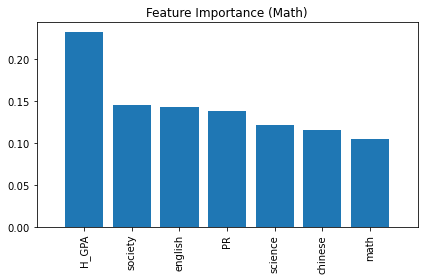

In [13]:
imp10 = RF10.feature_importances_
imp5 = RF10.feature_importances_
imp3 = RF10.feature_importances_
imp2 = RF10.feature_importances_
imp = []

for f in range(X_train.shape[1]):
    imp.append((imp10[f] + imp5[f] + imp3[f] + imp2[f])/4)
    
indices = np.argsort(imp)[::-1]

feat_labels = df.columns[0:7]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            imp[indices[f]]))

plt.title('Feature Importance (Math)')
plt.bar(range(X_train.shape[1]), 
        np.array(imp)[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [14]:
writelist = ["m",
            int(round(imp[0]*100)),int(round(imp[1]*100)),int(round(imp[2]*100)),
            int(round(imp[3]*100)),int(round(imp[4]*100)),int(round(imp[5]*100)),
            int(round(imp[6]*100))]
with open('result_FI.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(writelist)
    csvfile.close()